# RIHAL CODING CHALLENGE

This coding challenge consists of a program that read an image, uses OCR to translate it into text, and finally outputs specific required information.

***

# Imports

This section contains importing all the necessary modules and libraries to attempt this task. Pytesseract will be used to read and convert the uploaded png file from image to string. Image from PIL will be used to display the image. Regex (re) will be mainly used for locating specified characters in strings. finally, datetime will help with defining the dates and reformatting them. 

In [1]:
import pytesseract
from PIL import Image
import re
from datetime import datetime 

# Read image and OCR text

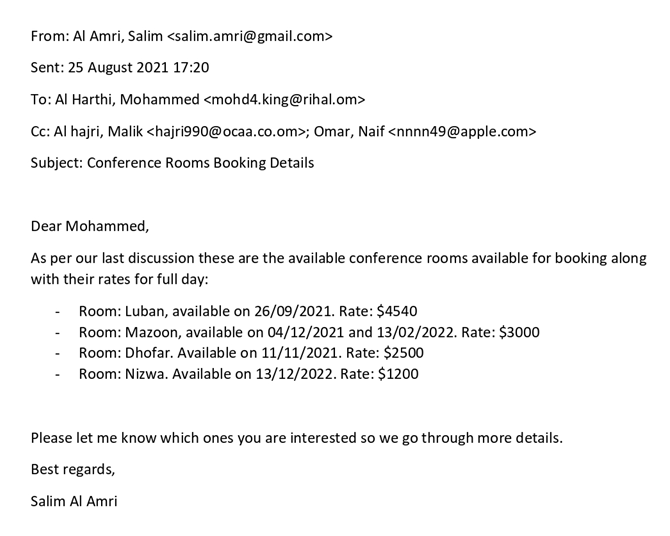

In [2]:
#display image

path = '/Users/hinai/Desktop/image.png'
display(Image.open(path))

In [3]:
#display text from image
text = pytesseract.image_to_string(Image.open(path))

#printing the output
print(text)

From: Al Amri, Salim <salim.amri@gmail.com>
Sent: 25 August 2021 17:20

To: Al Harthi, Mohammed <mohd4.king@rihal.om>

Ce: Al haji, Malik <hajri990@ ocaa.co.om>; Omar, Naif <nnnn49@apple.com>

Subject: Conference Rooms Booking Details

Dear Mohammed,

As per our last discussion these are the available conference rooms available for booking along
with their rates for full da

- Room: Luban, available on 26/09/2021. Rate: $4540
- Room: Mazoon, available on 04/12/2021 and 13/02/2022. Rate: $3000
- Room: Dhofar. Available on 11/11/2021. Rate: $2500
- Room: Nizwa. Available on 13/12/2022. Rate: $1200

Please let me know which ones you are interested so we go through more details.
Best regards,

Salim Al Amri



***

# Extracting Data

Task 1: Finding all the dates which are formatted as dd/mm/YYYY and reformatting to YYYY-MM-DD. 

In [4]:
# using regex to find all dates
dates = re.findall(r'\d+/\d+/\d+',text)

# defining the dates using datetime module 
date_obj = [datetime.strptime(d, '%d/%m/%Y') for d in dates]

# formatting the dates to YYYY-MM-DD formatt
dates = [d.strftime('%Y-%m-%d') for d in date_obj]

# printing the output
print(dates)

['2021-09-26', '2021-12-04', '2022-02-13', '2021-11-11', '2022-12-13']


---

Task 2: Finding all the Room Names                                        

Upon initial observations, every room name starts with a capital letter (A-Z) and follows a colon and a space (: ). These three characterisitics are included in the regex pattern bellow. As not all the rooms have the same number of letters, (a-z)* is used for all letters following the initial capital letter are lowercase. Finally, to avoid including names of people from the (To: ,and Cc: ) lines, (.,) are used at the end of the pattern because of further observations of the email.                                                    

Due to the inclusion of these extra characters, one more line of code is written to clean up the out put and remove ": ,."

In [5]:
# using regex to find all room names
room_name = re.findall(pattern = ": [A-Z][a-z]*[.,]",
                    string = text)

# removing the extra characters pre and prior to the names
room_name = [s.translate({ord(c): None for c in ": ,."}) for s in room_name]

# printing the output
print(room_name) 

['Luban', 'Mazoon', 'Dhofar', 'Nizwa']


---

Task 3: Finding all the room rates

This task can be simply completed by using the regex module as the rates are numbers that follow a "$" sign.

In [6]:
# using regex to find all 
rate = re.findall(pattern = "[$][0-9]*", string = text)

# printing the output
print(rate)

['$4540', '$3000', '$2500', '$1200']


---

Task 4: Finding all the Individual names and standardizing the output to "Firstname Lastname"

The names in the email are currenly written in the "Lastname, Firstname" format. Utilizing the regex module again and making use of the comma between the names, a pattern could be written that first checks for a capital letter, then allows any number of letters (Upper or lower case), a comma and a single space, Capital letter, and finally, allows any number of letters (Upper or lower case). 

To reformatt the names, the string will first be split through the comma and space, then joined in reverse order with a space in the middle

In [7]:
# using regex to find all individual names
names = re.findall(pattern = "[A-Z][a-zA-Z ]*, [A-Z][a-zA-Z]*",
                    string = text)

# reformatting the names into the required format
names = [" ".join(reversed(name.split(', '))) for name in names]

# printing the output
print(names)

['Salim Al Amri', 'Mohammed Al Harthi', 'Malik Al haji', 'Naif Omar']


--- 

Task 5: Finding all the emails

Regex is also used here with a pattern that allows for all upper and lowercase letters, dashes, dot, and finally underscores. Even though none of the emails contain underscores, this was added to include any further instances. This was then followed by an "@" symboml, and any combination of upper and lowercase letters, dots, and finally, a space was added to include the typo generated by the OCR. Fixes for such a typo will be mentioned in the conclusion. The fact that the emails are encapsulated by "<>" and contain "@" makes them unique and saves the solution from false inclusions.

In [8]:
# using regex to find all emails
emails = re.findall(pattern = "[a-zA-Z0-9.-/_]*@[a-zA-Z .]*",
                    string = text)

# printing the output
emails

['salim.amri@gmail.com',
 'mohd4.king@rihal.om',
 'hajri990@ ocaa.co.om',
 'nnnn49@apple.com']

---

# Conclusion 

The program had imperfections due to the nature of the pytesseract module. This could be improved in the future by trying out different image to text modules like easyocr or by preprocessing the image with modules like cv2. It is also important to note that the GPU also plays a role in the text output obtained by the module.